=== Testing HierarchicalClustering Key Functionalities ===

1. Testing cluster prefix...
   Cluster labels: ['C1' 'C2' 'C3' 'C4']
   Tree built: True

2. Testing dynamic tree cutting...
..cutHeight not given, setting it to 45.190625109118194  ===>  99% of the (truncated) height range in dendro.
..done.
   Dynamic clusters: [1 2 3 4]

3. Testing NetworkX support...
   NetworkX support available

4. Testing continuous tracks...
   Added continuous track: ['Gene_Expression']

5. Testing categorical tracks...
   All tracks: ['Gene_Expression', 'Treatment_Type']

6. Tree building successful: True

7. Testing visualization...
   Plot generated successfully

8. Clustering summary:
Hierarchical Clustering Summary
n_samples: 30
n_clusters: 4
method: ward
metric: euclidean
cut_method: maxclust

Cluster sizes:
  Cluster C1: 7 samples
  Cluster C2: 8 samples
  Cluster C3: 7 samples
  Cluster C4: 8 samples

✅ All key functionalities tested successfully!


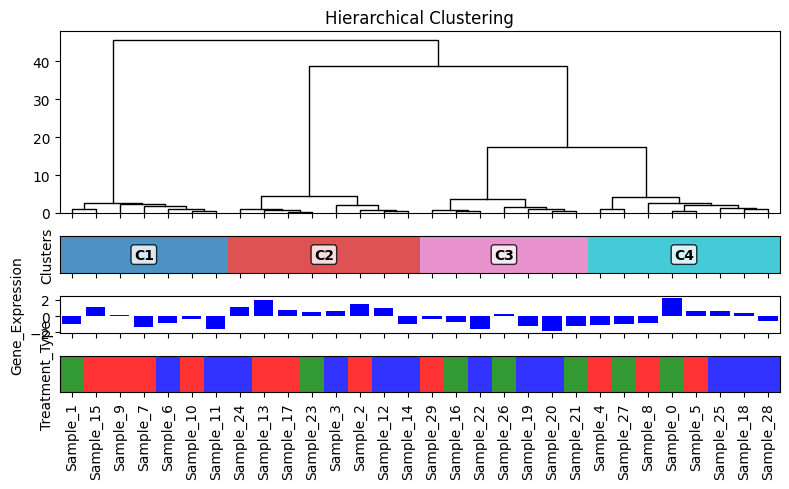

In [1]:
# Simple test for HierarchicalClustering - all key functionalities
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from skclust import HierarchicalClustering

# Create test data with clear clusters
X, y_true = make_blobs(n_samples=30, centers=4, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, index=[f"Sample_{i}" for i in range(30)], columns=['Feature1', 'Feature2'])

print("=== Testing HierarchicalClustering Key Functionalities ===\n")

# 1. Test basic clustering with cluster prefix
print("1. Testing cluster prefix...")
hc = HierarchicalClustering(method='ward', cut_method='maxclust', cut_threshold=4, cluster_prefix='C')
labels = hc.fit_transform(df)
print(f"   Cluster labels: {np.unique(labels)}")
print(f"   Tree built: {hc.tree_ is not None}")

# 2. Test dynamic tree cutting
print("\n2. Testing dynamic tree cutting...")
hc_dynamic = HierarchicalClustering(method='ward', cut_method='dynamic', min_cluster_size=3, deep_split=2)
try:
    labels_dynamic = hc_dynamic.fit_transform(df)
    print(f"   Dynamic clusters: {np.unique(labels_dynamic)}")
except Exception as e:
    print(f"   Dynamic cutting not available: {e}")

# 3. Test NetworkX support (if available)
print("\n3. Testing NetworkX support...")
try:
    from ensemble_networkx import Symmetric
    # This would test NetworkX Symmetric object input
    print("   NetworkX support available")
except ImportError:
    print("   NetworkX ensemble not available (optional)")

# 4. Test adding continuous track via pd.Series
print("\n4. Testing continuous tracks...")
continuous_track = pd.Series(np.random.normal(0, 1, 30), index=df.index, name='Expression')
hc.add_track('Gene_Expression', continuous_track, track_type='continuous', color='blue')
print(f"   Added continuous track: {list(hc.tracks_.keys())}")

# 5. Test adding categorical track via pd.Series  
print("\n5. Testing categorical tracks...")
categories = ['TypeA', 'TypeB', 'TypeC']
categorical_track = pd.Series(np.random.choice(categories, 30), index=df.index, name='Treatment')
color_map = {'TypeA': 'red', 'TypeB': 'green', 'TypeC': 'blue'}
hc.add_track('Treatment_Type', categorical_track, track_type='categorical', color=color_map)
print(f"   All tracks: {list(hc.tracks_.keys())}")

# 6. Test tree building (already tested above, but verify)
print(f"\n6. Tree building successful: {hc.tree_ is not None}")

# 7. Test plotting with all features
print("\n7. Testing visualization...")
fig, axes = hc.plot(figsize=(8,5), show_clusters=True, show_tracks=True, show_cluster_labels=True)
print("   Plot generated successfully")

# 8. Summary
print("\n8. Clustering summary:")
summary = hc.summary()

print("\n✅ All key functionalities tested successfully!")

2025-09-08 14:00:50.765 | INFO     | skclust:fit:933 - Creating 100 clusters for test set from 1000 samples...
2025-09-08 14:00:50.766 | INFO     | skclust:_stratified_clustering:1023 - Stratified clustering across 4 classes...


2025-09-08 14:00:50.767 | INFO     | skclust:_stratified_clustering:1032 -   Class 3: 25 clusters from 250 samples
2025-09-08 14:00:50.864 | INFO     | skclust:_stratified_clustering:1032 -   Class 2: 25 clusters from 250 samples
2025-09-08 14:00:50.897 | INFO     | skclust:_stratified_clustering:1032 -   Class 1: 25 clusters from 250 samples


Dataset shape: (1000, 2)
Class distribution: target
0    250
1    250
2    250
3    250
Name: count, dtype: int64


2025-09-08 14:00:50.968 | INFO     | skclust:_stratified_clustering:1032 -   Class 0: 25 clusters from 250 samples
2025-09-08 14:00:51.007 | INFO     | skclust:fit:957 - Selected 100 representatives as test set



Results:
Train set size: 900 (90.0%)
Test set size: 100 (10.0%)
Number of clusters created: 100

Class distribution in test set:
target
0    25
1    25
2    25
3    25
Name: count, dtype: int64


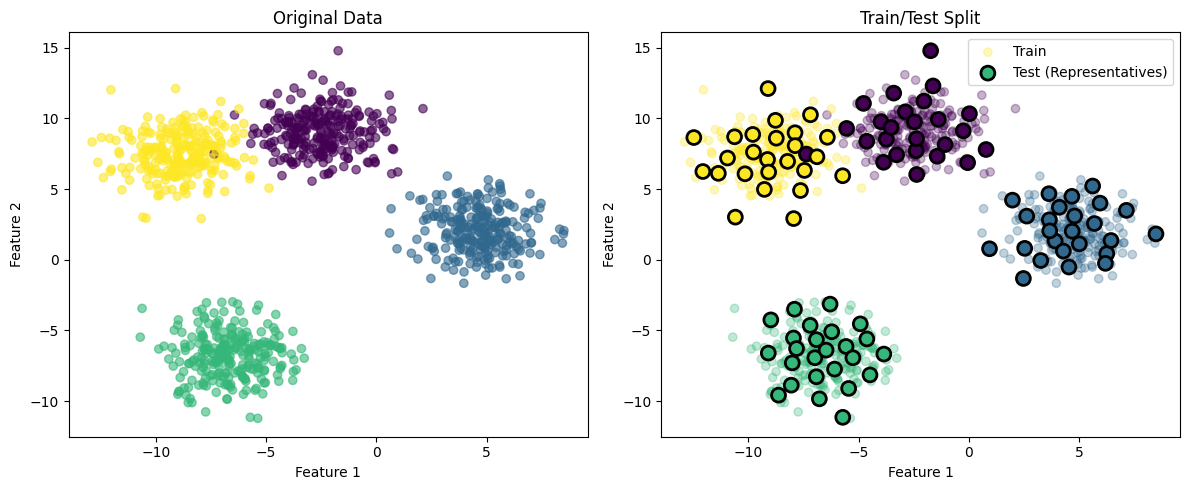

2025-09-08 14:00:51.218 | INFO     | skclust:fit:933 - Creating 150 clusters for test set from 1000 samples...
2025-09-08 14:00:51.219 | INFO     | skclust:_stratified_clustering:1023 - Stratified clustering across 4 classes...
2025-09-08 14:00:51.219 | INFO     | skclust:_stratified_clustering:1032 -   Class 3: 36 clusters from 250 samples



--- Testing with numpy arrays ---


2025-09-08 14:00:51.274 | INFO     | skclust:_stratified_clustering:1032 -   Class 2: 38 clusters from 250 samples
2025-09-08 14:00:51.329 | INFO     | skclust:_stratified_clustering:1032 -   Class 1: 38 clusters from 250 samples
2025-09-08 14:00:51.381 | INFO     | skclust:_stratified_clustering:1032 -   Class 0: 38 clusters from 250 samples
2025-09-08 14:00:51.433 | INFO     | skclust:fit:957 - Selected 150 representatives as test set
2025-09-08 14:00:51.435 | INFO     | skclust:fit:933 - Creating 50 clusters for test set from 1000 samples...
2025-09-08 14:00:51.435 | INFO     | skclust:_stratified_clustering:1023 - Stratified clustering across 4 classes...
2025-09-08 14:00:51.436 | INFO     | skclust:_stratified_clustering:1032 -   Class 3: 12 clusters from 250 samples
2025-09-08 14:00:51.455 | INFO     | skclust:_stratified_clustering:1032 -   Class 2: 12 clusters from 250 samples
2025-09-08 14:00:51.470 | INFO     | skclust:_stratified_clustering:1032 -   Class 1: 12 clusters from

Numpy test set size: 150 (15.0%)
Clusters created: 150

Transform method returns 100 samples

--- representative_indices_ demonstration ---
Pandas input (DataFrame with custom index):
Original DataFrame index range: 500 to 1499
Representative indices (first 10): [516, 542, 569, 600, 605, 606, 659, 681, 705, 710]
These are actual pandas index values, not positions!

Numpy input:
Representative indices (first 10): [16, 42, 69, 100, 105, 106, 159, 181, 205, 210]
These are array positions (0-based)

Verification - accessing original data:
Pandas: index 516 -> [-3.68407756  8.53119385]
Numpy: index 16 -> [-3.68407756  8.53119385]
✓ All tests passed!


In [2]:
# Simple test for KMeansRepresentativeSampler
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from skclust import KMeansRepresentativeSampler

# Generate test data
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, 
                  n_features=2, random_state=42)

# Convert to pandas for testing pandas support
X_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y_series = pd.Series(y, name='target')

print("Dataset shape:", X_df.shape)
print("Class distribution:", y_series.value_counts().sort_index())

# Test the sampler
sampler = KMeansRepresentativeSampler(
    sampling_size=0.1,  # 10% test set
    stratify=True,
    method='minibatch',
    random_state=42
)

# Fit and get train/test split
X_train, X_test, y_train, y_test = sampler.fit(X_df, y_series).get_train_test_split(X_df, y_series)

print(f"\nResults:")
print(f"Train set size: {len(X_train)} ({len(X_train)/len(X_df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X_df)*100:.1f}%)")
print(f"Number of clusters created: {sampler.n_clusters_}")

print(f"\nClass distribution in test set:")
print(y_test.value_counts().sort_index())

# Quick visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original data
scatter1 = ax1.scatter(X_df['feature_1'], X_df['feature_2'], c=y_series, alpha=0.6, cmap='viridis')
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Train/test split
ax2.scatter(X_train['feature_1'], X_train['feature_2'], c=y_train, alpha=0.3, cmap='viridis', label='Train')
ax2.scatter(X_test['feature_1'], X_test['feature_2'], c=y_test, s=100, cmap='viridis', 
           edgecolors='black', linewidth=2, label='Test (Representatives)')
ax2.set_title('Train/Test Split')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.tight_layout()
plt.show()

# Test with numpy arrays too
print(f"\n--- Testing with numpy arrays ---")
sampler_np = KMeansRepresentativeSampler(sampling_size=0.15, stratify=True, method='kmeans', random_state=42)
X_train_np, X_test_np, y_train_np, y_test_np = sampler_np.fit(X, y).get_train_test_split(X, y)

print(f"Numpy test set size: {len(X_test_np)} ({len(X_test_np)/len(X)*100:.1f}%)")
print(f"Clusters created: {sampler_np.n_clusters_}")

# Test transform method
test_subset = sampler.transform(X_df)
print(f"\nTransform method returns {len(test_subset)} samples")

# Show representative_indices_ in action
print(f"\n--- representative_indices_ demonstration ---")
print("Pandas input (DataFrame with custom index):")
# Create DataFrame with custom index to show the difference
X_custom_idx = X_df.copy()
X_custom_idx.index = range(500, 1500)  # Custom index starting at 500

sampler_custom = KMeansRepresentativeSampler(sampling_size=0.05, stratify=True, random_state=42)
sampler_custom.fit(X_custom_idx, y_series)

print(f"Original DataFrame index range: {X_custom_idx.index.min()} to {X_custom_idx.index.max()}")
print(f"Representative indices (first 10): {sampler_custom.representative_indices_[:10].tolist()}")
print(f"These are actual pandas index values, not positions!")

print(f"\nNumpy input:")
sampler_numpy = KMeansRepresentativeSampler(sampling_size=0.05, stratify=True, random_state=42)
sampler_numpy.fit(X, y)
print(f"Representative indices (first 10): {sampler_numpy.representative_indices_[:10].tolist()}")
print(f"These are array positions (0-based)")

# Verify they work for accessing data
print(f"\nVerification - accessing original data:")
pandas_repr_sample = X_custom_idx.loc[sampler_custom.representative_indices_[0]]
numpy_repr_sample = X[sampler_numpy.representative_indices_[0]]
print(f"Pandas: index {sampler_custom.representative_indices_[0]} -> {pandas_repr_sample.values}")
print(f"Numpy: index {sampler_numpy.representative_indices_[0]} -> {numpy_repr_sample}")

print("✓ All tests passed!")

..cutHeight not given, setting it to 82.86482631555864  ===>  99% of the (truncated) height range in dendro.
..done.
Found 4 clusters


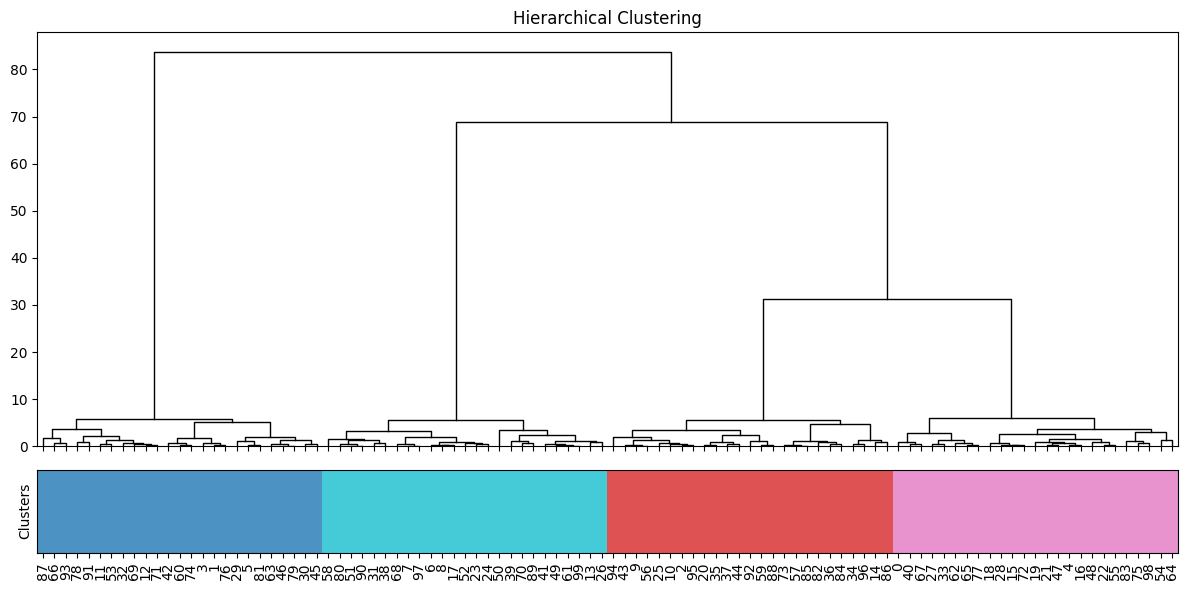

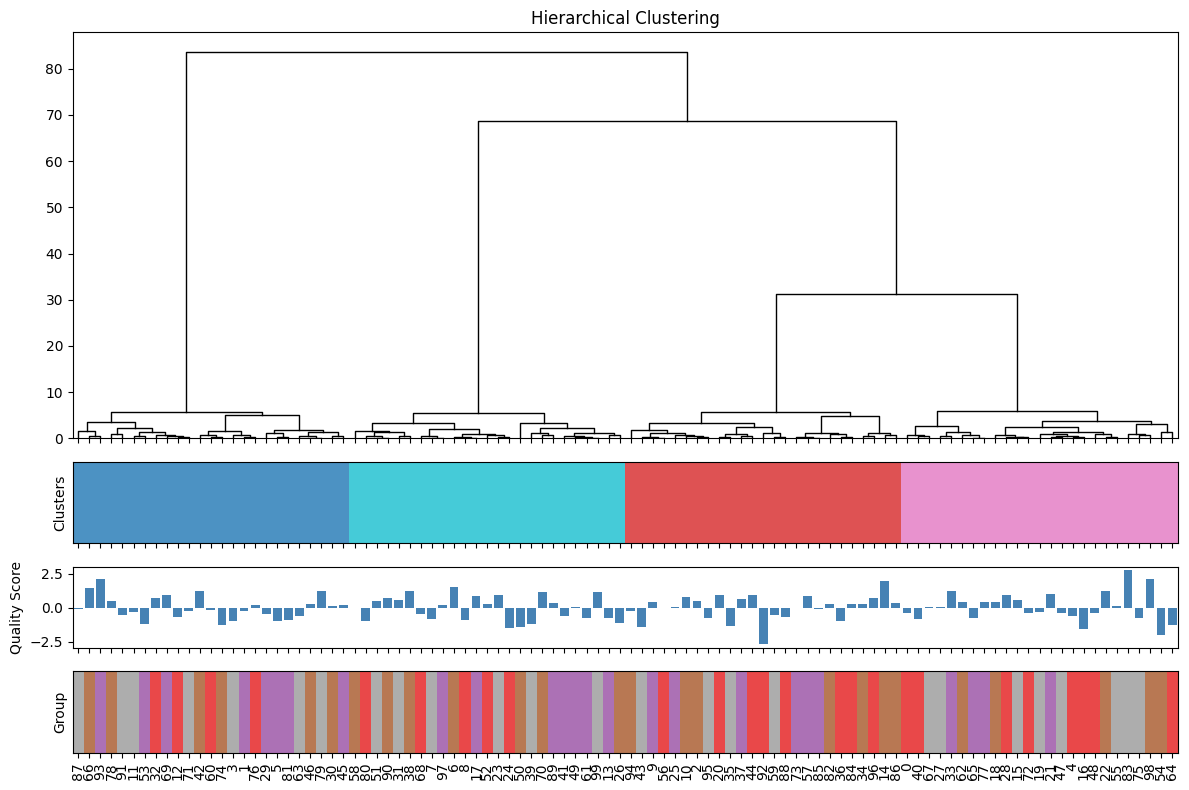

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from skclust import HierarchicalClustering

# Generate sample data
X, y = make_blobs(n_samples=100, centers=4, random_state=42)
X_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

# Perform hierarchical clustering
hc = HierarchicalClustering(
    method='ward',
    cut_method='dynamic',
    min_cluster_size=5
)

# Fit and get cluster labels
labels = hc.fit_transform(X_df)
print(f"Found {hc.n_clusters_} clusters")

# Plot dendrogram with clusters
fig, axes = hc.plot(figsize=(12, 6), show_clusters=True)

# Add continuous metadata track
sample_scores = pd.Series(np.random.randn(100), index=X_df.index)
hc.add_track('Quality Score', sample_scores, track_type='continuous')

# Add categorical metadata track
sample_groups = pd.Series(['A', 'B', 'C', 'D'] * 25, index=X_df.index[:100])
hc.add_track('Group', sample_groups, track_type='categorical')

# Plot with metadata tracks
fig, axes = hc.plot(show_tracks=True, figsize=(12, 8))

In [10]:
from skclust import KMeansRepresentativeSampler

# Create representative test set (10% of data)
sampler = KMeansRepresentativeSampler(
    sampling_size=0.1,
    stratify=True,  # Maintain class proportions
    method='minibatch'
)

# Get train/test split
X_train, X_test, y_train, y_test = sampler.fit(X_df, y).get_train_test_split(X_df, y)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X_df)*100:.1f}%)")

2025-09-08 14:04:25.165 | INFO     | skclust:fit:933 - Creating 10 clusters for test set from 100 samples...
2025-09-08 14:04:25.166 | INFO     | skclust:_stratified_clustering:1023 - Stratified clustering across 4 classes...
2025-09-08 14:04:25.167 | INFO     | skclust:_stratified_clustering:1032 -   Class 3: 2 clusters from 25 samples
2025-09-08 14:04:25.184 | INFO     | skclust:_stratified_clustering:1032 -   Class 2: 2 clusters from 25 samples
2025-09-08 14:04:25.193 | INFO     | skclust:_stratified_clustering:1032 -   Class 0: 2 clusters from 25 samples
2025-09-08 14:04:25.201 | INFO     | skclust:_stratified_clustering:1032 -   Class 1: 2 clusters from 25 samples
2025-09-08 14:04:25.206 | INFO     | skclust:fit:957 - Selected 8 representatives as test set


Train set: 92 samples
Test set: 8 samples (8.0%)


In [15]:
# Cut by height
hc_height = HierarchicalClustering(
    method='ward',
    cut_method='height',
    cut_threshold=50.0,
)
labels_height = hc_height.fit_transform(X_df)

# Cut by number of clusters
hc_maxclust = HierarchicalClustering(
    method='complete',
    cut_method='maxclust',
    cluster_prefix="c",
    cut_threshold=5  # Force exactly 5 clusters
    
)
labels_maxclust = hc_maxclust.fit_transform(X_df)
labels_maxclust

array(['c5', 'c1', 'c4', 'c1', 'c5', 'c1', 'c3', 'c3', 'c3', 'c4', 'c4',
       'c1', 'c1', 'c3', 'c4', 'c5', 'c5', 'c3', 'c5', 'c5', 'c4', 'c5',
       'c5', 'c3', 'c3', 'c4', 'c3', 'c5', 'c5', 'c1', 'c1', 'c2', 'c1',
       'c5', 'c4', 'c4', 'c4', 'c4', 'c2', 'c2', 'c5', 'c3', 'c1', 'c4',
       'c4', 'c1', 'c1', 'c5', 'c5', 'c3', 'c3', 'c2', 'c3', 'c1', 'c5',
       'c5', 'c4', 'c4', 'c2', 'c4', 'c1', 'c3', 'c5', 'c1', 'c5', 'c5',
       'c1', 'c5', 'c3', 'c1', 'c2', 'c1', 'c5', 'c4', 'c1', 'c5', 'c1',
       'c5', 'c1', 'c1', 'c2', 'c1', 'c4', 'c5', 'c4', 'c4', 'c4', 'c1',
       'c4', 'c2', 'c2', 'c1', 'c4', 'c1', 'c4', 'c4', 'c4', 'c3', 'c5',
       'c3'], dtype=object)

In [16]:
from scipy.spatial.distance import pdist, squareform

# Compute custom distance matrix
distances = pdist(X_df, metric='cosine')
distance_matrix = pd.DataFrame(squareform(distances), 
                              index=X_df.index, 
                              columns=X_df.index)

# Cluster using precomputed distances
hc_custom = HierarchicalClustering(method='average')
labels_custom = hc_custom.fit_transform(distance_matrix)

..cutHeight not given, setting it to 1.4096950118136868  ===>  99% of the (truncated) height range in dendro.
..done.


In [17]:
# Enhanced stratified sampling with minority class boosting
sampler_enhanced = KMeansRepresentativeSampler(
    sampling_size=0.15,
    stratify=True,
    coverage_boost=2.0,  # Boost minority classes
    min_clusters_per_class=3,  # Ensure minimum representation
    method='kmeans'
)

X_train, X_test, y_train, y_test = sampler_enhanced.fit(X_df, y).get_train_test_split(X_df, y)

# Check class balance preservation
print("Original class distribution:")
print(pd.Series(y).value_counts().sort_index())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

2025-09-08 14:06:26.684 | INFO     | skclust:fit:933 - Creating 15 clusters for test set from 100 samples...
2025-09-08 14:06:26.686 | INFO     | skclust:_stratified_clustering:1023 - Stratified clustering across 4 classes...
2025-09-08 14:06:26.687 | INFO     | skclust:_stratified_clustering:1032 -   Class 3: 3 clusters from 25 samples
2025-09-08 14:06:26.708 | INFO     | skclust:_stratified_clustering:1032 -   Class 2: 4 clusters from 25 samples
2025-09-08 14:06:26.723 | INFO     | skclust:_stratified_clustering:1032 -   Class 0: 4 clusters from 25 samples
2025-09-08 14:06:26.733 | INFO     | skclust:_stratified_clustering:1032 -   Class 1: 4 clusters from 25 samples
2025-09-08 14:06:26.744 | INFO     | skclust:fit:957 - Selected 15 representatives as test set


Original class distribution:
0    25
1    25
2    25
3    25
Name: count, dtype: int64

Test set class distribution:
0    4
1    4
2    4
3    3
Name: count, dtype: int64
